# Aula 7 - Regressão linear

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) Introdução
- 2) Regressão linear simples
- 3) Regressão linear múltipla
- 4) Tradeoff viés-variância

____
____
____

## 1) Introdução

Imagine que você que vender sua casa.

Você sabe os atributos da sua casa: quantos cômodos têm, quantos carros cabem na garagem, qual é a área construída, qual sua localidade, etc.

Agora, a pergunta é: qual seria o melhor preço pra você colocá-la a venda, ou seja, quanto de fato ela vale?

Você pode solicitar a avaliação de um corretor de imóveis (contanto com a experiência dele), ou então...

...fazer um modelo de **Machine Learning**, que, com base nos atributos e preços de diversas outras casas, pode fazer uma **predição** sobre o preço adequado da sua casa!

Para resolver este problema, podemos utilizar um dos mais simples e importantes algoritmos de machine learning: a Regressão Linear!

____

Para introduzirmos as ideias, vamos usar um [dataset de preço de casas](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).

Esta base de dados contém **70 features** (+ 1 ID), que são as características de cada uma das casas listadas; e **1 target**, que é o preço pelo qual aquela casa foi vendida.

Para o significado de cada uma das features, e os valores que elas podem assumir, veja a página acima.

**Vamos ler a base e começar a explorá-la!**

In [1]:
# importe as principais bibliotecas de análise de dados
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# leia a base

df = pd.read_csv("../datasets/house_prices.csv")

In [3]:
df["coluna com espaço"] = "aaa"

In [4]:
# dê uma olhada nas 5 primeiras linhas

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,coluna com espaço
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,aaa
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,aaa
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,aaa
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,aaa
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,aaa


In [5]:
# dê uma olhada na estrutura das colunas

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 1460 non-null   int64  
 1   MSSubClass         1460 non-null   int64  
 2   MSZoning           1460 non-null   object 
 3   LotFrontage        1201 non-null   float64
 4   LotArea            1460 non-null   int64  
 5   Street             1460 non-null   object 
 6   Alley              91 non-null     object 
 7   LotShape           1460 non-null   object 
 8   LandContour        1460 non-null   object 
 9   Utilities          1460 non-null   object 
 10  LotConfig          1460 non-null   object 
 11  LandSlope          1460 non-null   object 
 12  Neighborhood       1460 non-null   object 
 13  Condition1         1460 non-null   object 
 14  Condition2         1460 non-null   object 
 15  BldgType           1460 non-null   object 
 16  HouseStyle         1460 

In [6]:
# algumas estatísticas rápidas?

df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# há dados missing?
# use um heatmap, se preferir!

nulos = df.isnull().sum()

In [8]:
nulos[nulos!=0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

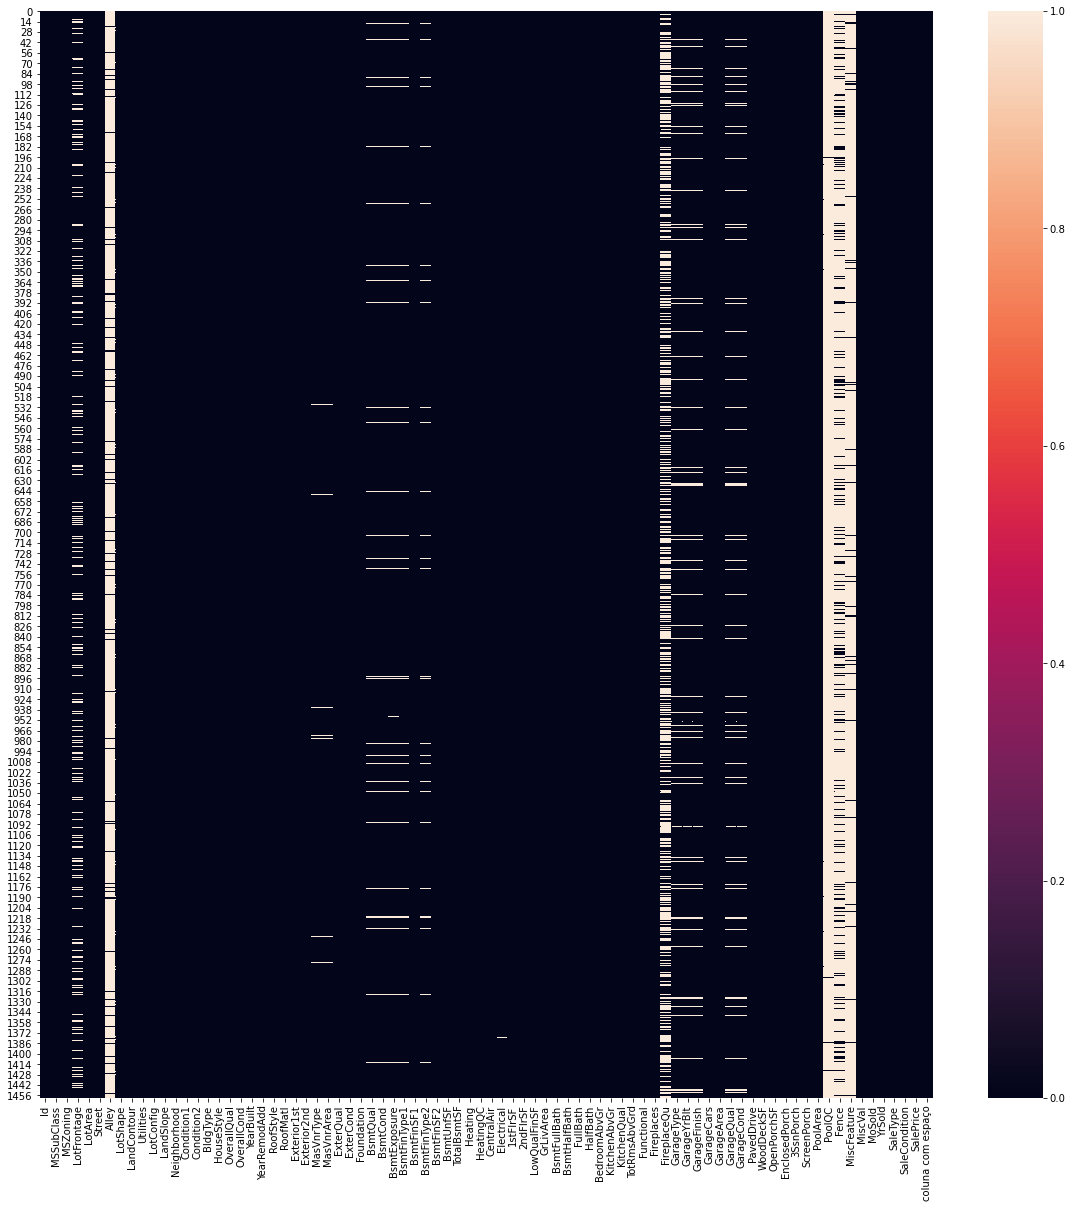

In [9]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.isnull())

Por enquanto, não vamos nos preocupar com os dados missing, pois vamos usar apenas uma feature no nosso modelo inicial.

Aproveite para depois explorar os dados da forma que quiser!

Por enquanto, vamos dar uma olhada na coluna target!

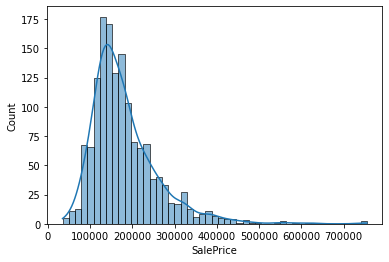

In [10]:
# dê uma olhada na distribuição dos preções "SalePrice"

sns.histplot(df["SalePrice"], kde=True)

Fica evidente que a distribuição é desviada para a direita.

Vamos tentar alterar isso na próximas versões do modelo para ver se teremos ganhos de performance!

Por enquanto, seguimos assim.

In [11]:
# Dê uma olhada na correlação entre as variáveis

corr = df.corr()

In [12]:
corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [13]:
corr["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [14]:
# veja quais são as variáveis mais correlacionadas com o target!

corr[corr["SalePrice"].abs() > 0.7]["SalePrice"]

OverallQual    0.790982
GrLivArea      0.708624
SalePrice      1.000000
Name: SalePrice, dtype: float64

In [15]:
df.corr()['SalePrice'].sort_values(ascending = False)[:3]

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
Name: SalePrice, dtype: float64

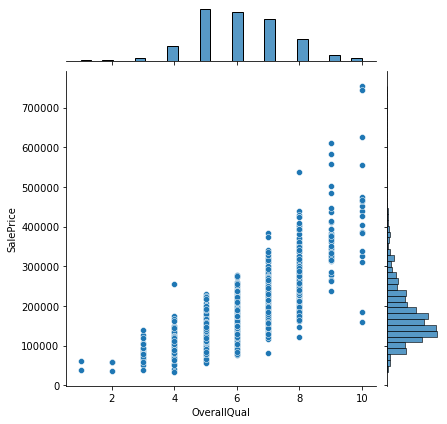

In [16]:
# explore agora a relação entre essas variáveis e o target
# dica: faça um jointplot ou scatterplot

sns.jointplot(data=df, x="OverallQual", y="SalePrice")

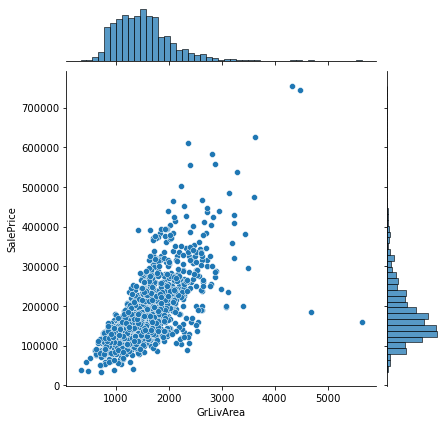

In [17]:
sns.jointplot(data=df, x="GrLivArea", y="SalePrice")

Parece que a variável de área construída ("GrLivArea") é uma forte candidata a **explicar** o preço das casas, pois vemos calaramente uma correlação entre as variáveis!

Mas note que há claramente dois outliers... 

In [18]:
# identifique e remova os outliers

df = df[~((df["GrLivArea"] > 4000) & (df["SalePrice"] < 250000))]

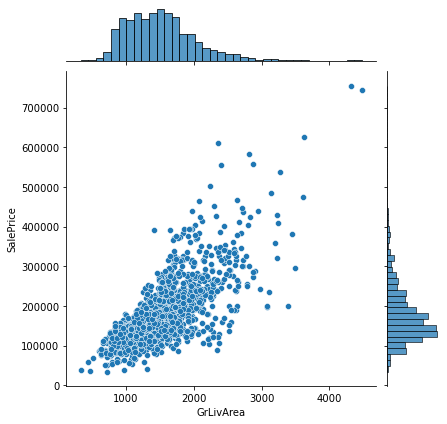

In [19]:
# faça o scatterplot novamente para verificar se os outliers sumiram

sns.jointplot(data=df, x="GrLivArea", y="SalePrice")

Vamos agora iniciar a construção de um modelo bem simples, que utilize a variável GrLivArea para predizer o preço!

___
___
___

## 2) Regressão linear simples

Apesar de alguns outliers, parece bem adequado que os pontos plotados acima sejam descritos por uma reta, não é mesmo?

Ou, melhor dizendo: **a variável GrLivArea parece estar relacionada ao target SalePrice linearmente!**

Para modelarmos esta relação, vamos conhecer o modelo de **Regressão Linear Simples**.

Como o próprio nome diz, o modelo de Regressão Linear será **uma reta (polinômio linear)**, que melhor se ajusta aos seus dados!

O modelo de **Regressão Linear Simples** será uma linha reta que relaciona Y (o preço da casa) e X (os atributos da casa). 

Se utilizarmos **apenas um atributo** (como, por exemplo, a área construída), temos uma **Regressão Linear Simples**, e nosso modelo é:

$$ y = b_0 + b_1 X $$

Neste caso, o modelo tem dois coeficientes a serem determinados: $b_0$ (intercepto ou coeficiente linear) e $b_1$ (coeficiente angular). 

O algoritmo do estimador é utilizado justamente para encontrarmos os coeficientes $b_0$ e $b_1$ **que melhor se ajustam aos dados!**

Para fazer isso, pode-se utilizar o método dos **mínimos quadrados** ou então o **gradiente descendente**.

Mas não nos preocuparemos com os detalhes do treinamento: usaremos o sklearn para isso!

Vamos começar?

In [20]:
# crie duas variáveis, X e y, respectivamente os arrays da feature GrLiveArea e do target

X = df["GrLivArea"]

y = df["SalePrice"]

In [21]:
# 1) Importe a classe do estimador que se deseja treinar

from sklearn.linear_model import LinearRegression

In [22]:
# 2) Instancie a classe do estimador, escolhendo os hiperparâmetros desejados

estimador = LinearRegression()

In [23]:
# 3) Separe os dados em dados de treino e dados de teste
# dica: procure pelo "train_test_split"

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
X

0       1710
1       1262
2       1786
3       1717
4       2198
        ... 
1455    1647
1456    2073
1457    2340
1458    1078
1459    1256
Name: GrLivArea, Length: 1458, dtype: int64

In [25]:
X_train

254     1314
1066    1571
865     1002
799     1768
380     1691
        ... 
1096    1355
1131     974
1295    1052
861     1039
1127    1530
Name: GrLivArea, Length: 1166, dtype: int64

In [26]:
X_test

1322    1923
837      987
413     1028
522     1664
1036    1620
        ... 
479     1131
1361    1530
1415    1569
651     1510
722      864
Name: GrLivArea, Length: 292, dtype: int64

In [27]:
np.array(X_train).reshape(-1, 1)

array([[1314],
       [1571],
       [1002],
       ...,
       [1052],
       [1039],
       [1530]], dtype=int64)

In [28]:
# 4) Treine o modelo, usando os dados de treino. 
# Este é um modelo simples, não tem muitos hiperparâmetros relevantes
# obs: é necessário dar um reshape nas features!

modelo = estimador.fit(np.array(X_train).reshape(-1, 1), y_train)

Agora que o modelo está treinado, podemos dar uma olhada nos coeficientes que foram encontrados!

In [29]:
# pegue o intercet. Dica: veja os atributos do modelo treinado!

b_0 = modelo.intercept_

b_0

1562.0121909831068

In [30]:
# peque o coeficiente angular. Dica: veja os atributos do modelo treinado!

b_1 = modelo.coef_[0]

b_1

118.61219879940967

Como interpretamos este resultado?

O nosso modelo final é dado por:

$$ y = 1562.01 + 118.61 \times \text{GrLiveArea}$$

Isto quer dizer que:

> Aumentando a variável "GrLiveArea" em uma unidade faz com que o preço seja aumentado em USD 118.6!

> O preço mínimo a ser pago, independente da área construída, é de 1562.01!

Podemos visualizar o modelo treinado, neste caso:

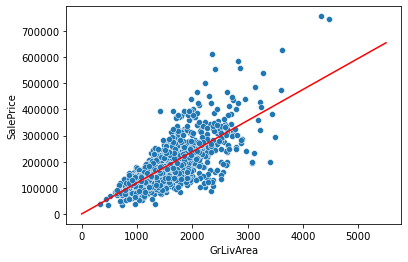

In [31]:
# faça um scatterplot da fgeature pelo target
sns.scatterplot(data=df, x="GrLivArea", y="SalePrice")

# faça um plot da reta do modelo
# crie um array com os valores de x. dica:  use o range aproximado da variável GrLivArea
# crie um array de y com a equação da reta usando os coeficientes encontrados
x = np.linspace(0, 5500, 10000)
y = modelo.intercept_ + modelo.coef_[0]*x
plt.plot(x, y, color="red")


Linear Model = LM

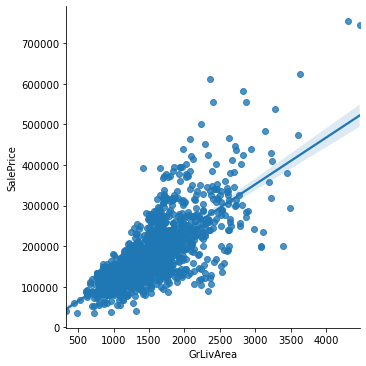

In [32]:
# é possível fazer o mesmo com o "sns.lmplot()", automaticamente!
sns.lmplot(data=df, x="GrLivArea", y="SalePrice")

Fazendo uma previsão:

In [33]:
x = 2780
y = modelo.intercept_ + modelo.coef_[0]*x

print("Preço justo:", y)

Preço justo: 331303.924853342


Ou ainda:

In [34]:
x = 2780
y = modelo.predict([[x]])

print("Preço justo:", y)

Preço justo: [331303.92485334]


É raro que consigamos visualizar nosso modelo final como fizemos acima, mas no caso da regressão linear simples, temos essa sorte! :)

Vamos agora fazer algumas previsões!

In [35]:
np.array(X_test).reshape(-1, 1)

array([[1923],
       [ 987],
       [1028],
       [1664],
       [1620],
       [1054],
       [1954],
       [2520],
       [1970],
       [1393],
       [1320],
       [1405],
       [1441],
       [2132],
       [1690],
       [1445],
       [1720],
       [1134],
       [1040],
       [1479],
       [1306],
       [1590],
       [1476],
       [3086],
       [1431],
       [1199],
       [1340],
       [ 864],
       [1604],
       [1118],
       [1252],
       [1048],
       [1660],
       [ 952],
       [1636],
       [2898],
       [1412],
       [1928],
       [1346],
       [ 882],
       [1176],
       [2110],
       [ 950],
       [ 816],
       [ 988],
       [1501],
       [1082],
       [ 955],
       [ 816],
       [1308],
       [2058],
       [1128],
       [1304],
       [1656],
       [ 848],
       [1734],
       [1775],
       [1126],
       [1117],
       [ 334],
       [ 520],
       [1316],
       [2473],
       [1506],
       [1776],
       [2158],
       [10

In [36]:
X_test

1322    1923
837      987
413     1028
522     1664
1036    1620
        ... 
479     1131
1361    1530
1415    1569
651     1510
722      864
Name: GrLivArea, Length: 292, dtype: int64

In [37]:
# 5) Use o modelo treinado para fazer previsões usando os dados de teste 

y_pred = modelo.predict(np.array(X_test).reshape(-1, 1))

In [38]:
pd.Series(y_pred)

0      229653.270482
1      118632.252406
2      123495.352557
3      198932.710993
4      193713.774246
           ...      
287    135712.409033
288    183038.676354
289    187664.552107
290    180666.432378
291    104042.951954
Length: 292, dtype: float64

In [39]:
y_test

1322    190000
837     100000
413     115000
522     159000
1036    315500
         ...  
479      89471
1361    260000
1415    175900
651     108000
722     124500
Name: SalePrice, Length: 292, dtype: int64

Agora que temos o modelo treinado e algumas previsões, como avaliamos a performance do modelo?

Para isso, podemos dar uma olhada nos **resíduos** das predições! Os resíduos nada mais são do que**os erros do modelo**, ou seja, **a diferença entre cada valor predito e o valor real**, para **os dados de teste!**. Isto é,

$$R(y_i) = y_i - \hat{y}_i $$

$$R(y_i) + \hat{y}_i= y_i  $$

$$ \hat{y}_i= y_i - R(y_i)  $$

$ y_i = \hat{y}_i $

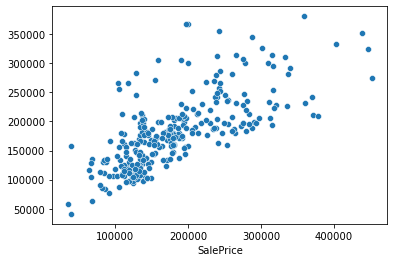

In [40]:
# faça um scatterplot do valor predito pelo valor real

sns.scatterplot(x=y_test, y=y_pred)

O caso 100% ideal seria $y_i = \hat{y}_i$, o que produziria uma reta exata!

Quanto mais "espalhados" estiverem os pontos em torno da reta, em geral **pior é o modelo**, pois ele está errando mais!

Uma forma de quantificar isso através de uma métrica conhecida como **$R^2$**, o **coeficiente de determinação**.

Este coeficiente indica **o quão próximos os dados estão da reta ajustada**. Por outro lado, o $R^2$ representa a porcentagem de variação na resposta que é explicada pelo modelo.

$$R^2 = 1 - \frac{\sum_{i=1}^n(y_i-\hat{y}_i)^2}{\sum_{i=1}^n(y_i-\bar{y})^2}$$

É possível utilizar o $R^2$ nos dados de treino, mas isso não é tão significante, devido ao overfitting, que discutiremos a seguir. Mais sgnificativo é calcularmos o $R^2$ nos dados de teste como faremos a seguir. Essa métrica equivale, portanto, **ao gráfico que fizemos acima!**


In [41]:
# r^2 
from sklearn import metrics

metrics.r2_score(y_test, y_pred)

0.49160330551638054

Outra coisa importante é que os resíduos sejam **normalmente distribuídos**.

Se esse não for o caso, é muito importante que você reveja se o modelo escolhido de fato é adequado ao seu problema!

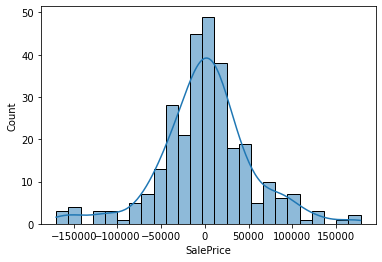

In [42]:
# dê uma olhada na distribuição dos resíduos
res = y_test - y_pred

sns.histplot(x=res, kde=True)

Além dos resíduos, existem três principais **métricas de avaliação** do modelo de regressão linear:

**Mean Absolute Error** (MAE) é a média do valor absoluto de todos os resíduos (erros):

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) é a média dos erros quadrados:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) é a raiz quadrada da média dos erros quadrados:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparando as métricas:

- **MAE** é a mais simples de entender, mas ela penaliza mais erros menores;
- **MSE** é a métrica mais popular, pois essa métrica penaliza mais erros maiores, o que faz mais sentido em aplicações reais.
- **RMSE** é ainda mais popular, pois esta métrica está nas mesmas unidades que o target.

Estas métricas todas podem ser utilizadas como **funções de custo** a serem minimizadas pelo algoritmo do estimador.

In [43]:
from sklearn import metrics

In [44]:
df["SalePrice"].describe()

count      1458.000000
mean     180932.919067
std       79495.055285
min       34900.000000
25%      129925.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [45]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 37694.28175792022
MSE: 2808244730.245439
RMSE: 52992.874334625776


Vamos dar uma olhada em tudo junto:


Intercepto: 1562.0121909831068
Coeficienter angular: [118.6121988]

####################################################



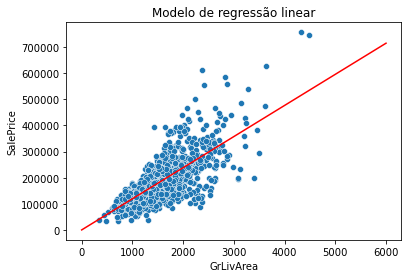


####################################################



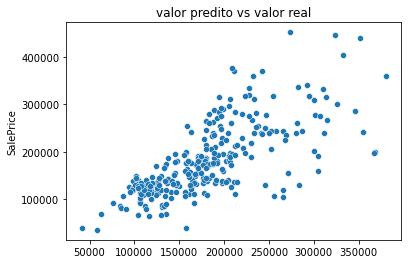

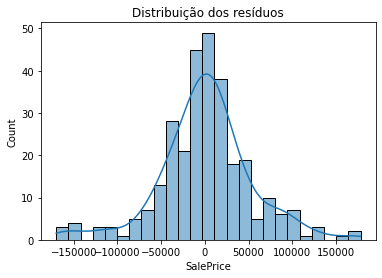


####################################################


Métricas de avaliação:

R^2: 0.49160330551638054
MAE: 37694.28175792022
MSE: 2808244730.245439
RMSE: 52992.874334625776


In [46]:
X = df['GrLivArea']
y = df['SalePrice']

# 1)
from sklearn.linear_model import LinearRegression

# 2)
estimador = LinearRegression()

# 3)
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# 4)
modelo = estimador.fit(np.array(X_treino).reshape(-1, 1), y_treino)

print("Intercepto:", modelo.intercept_)
print("Coeficienter angular:", modelo.coef_)

print("\n####################################################\n")

plt.title("Modelo de regressão linear")

sns.scatterplot(data=df, x="GrLivArea", y="SalePrice")

x = np.linspace(0, 6000, 100000)
y = modelo.intercept_ + modelo.coef_[0]*x
plt.plot(x, y, color="red")
plt.show()

print("\n####################################################\n")

# 5)
predictions = modelo.predict(np.array(X_teste).reshape(-1, 1))

plt.title("valor predito vs valor real")
sns.scatterplot(x=predictions, y=y_teste)
plt.show()

plt.title("Distribuição dos resíduos")
sns.histplot(y_teste-predictions, kde=True)
plt.show()

print("\n####################################################\n")

print("\nMétricas de avaliação:")

# 6) 
from sklearn import metrics

print('\nR^2:', metrics.r2_score(y_test, predictions))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Vamos fazer algumas mudanças?

___
___
___

## 3) Regressão linear múltipla

O modelo que fizemos acima considera uma única feature como preditora do preço da casa.

Mas temos outras 78 dessas features! Será que não há mais informação útil em todas essas outras variáveis?

Em geral, sim! É natural que esperemos que **mais variáveis** tragam **mais informações** ao modelo, e, portanto, o torne mais preciso!

Para incorporar estas outras variáveis ao modelo, é muito simples! 

Podemos passar a utilizar outros atributos (como o número de cômodos, qual é a renda média da vizinhança, etc.), e neste caso teremos uma **Regressão Linear Múltipla**, que nada mais é que a seguinte equação:

$$ y = b_0 + b_1 X_1 + b_2 X_2 + \cdots + b_n X_n $$

Neste caso, além de $b_0$ e $b_1$, temos também outros coeficientes, um pra cada uma das $n$ features que escolhermos!

Modelos de regressão múltipla são potencialmente mais precisos, mas há também um lado ruim: nós perdemos a **possibilidade de visualização**. Agora, não temos mais uma reta, mas sim um **hiperplano** que relaciona todas as features com o target!

<img src="https://miro.medium.com/max/1120/0*rGSfRsMjiQeG5jof.png" width=500>

Vamos construir esse modelo?

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 1458 non-null   int64  
 1   MSSubClass         1458 non-null   int64  
 2   MSZoning           1458 non-null   object 
 3   LotFrontage        1199 non-null   float64
 4   LotArea            1458 non-null   int64  
 5   Street             1458 non-null   object 
 6   Alley              91 non-null     object 
 7   LotShape           1458 non-null   object 
 8   LandContour        1458 non-null   object 
 9   Utilities          1458 non-null   object 
 10  LotConfig          1458 non-null   object 
 11  LandSlope          1458 non-null   object 
 12  Neighborhood       1458 non-null   object 
 13  Condition1         1458 non-null   object 
 14  Condition2         1458 non-null   object 
 15  BldgType           1458 non-null   object 
 16  HouseStyle         1458 

In [48]:
df.select_dtypes(include=[np.number]).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1458 non-null   int64  
 1   MSSubClass     1458 non-null   int64  
 2   LotFrontage    1199 non-null   float64
 3   LotArea        1458 non-null   int64  
 4   OverallQual    1458 non-null   int64  
 5   OverallCond    1458 non-null   int64  
 6   YearBuilt      1458 non-null   int64  
 7   YearRemodAdd   1458 non-null   int64  
 8   MasVnrArea     1450 non-null   float64
 9   BsmtFinSF1     1458 non-null   int64  
 10  BsmtFinSF2     1458 non-null   int64  
 11  BsmtUnfSF      1458 non-null   int64  
 12  TotalBsmtSF    1458 non-null   int64  
 13  1stFlrSF       1458 non-null   int64  
 14  2ndFlrSF       1458 non-null   int64  
 15  LowQualFinSF   1458 non-null   int64  
 16  GrLivArea      1458 non-null   int64  
 17  BsmtFullBath   1458 non-null   int64  
 18  BsmtHalf

In [50]:
df.isnull().sum()

Id                     0
MSSubClass             0
MSZoning               0
LotFrontage          259
LotArea                0
                    ... 
YrSold                 0
SaleType               0
SaleCondition          0
SalePrice              0
coluna com espaço      0
Length: 82, dtype: int64

In [51]:
# selecione todas as outras colunas numéricas como a variável de features X
# dica: df.select_dtypes(include=[np.number])

df = df.select_dtypes(include=[np.number])

df = df.dropna(axis="columns", how="any")

Observação: a coluna "Id" traz apenas um número de identificação arbitrário que não deve ser correlacionado com o target. Portanto, vamos desconsiderar esta coluna de nosso modelo!

Intercepto: -355999.7470667332
Coeficienter angular: [-1.12585601e+02  4.90238272e-01  1.46756366e+04  5.05565957e+03
  3.94922596e+02  1.34368773e+02  2.59168796e+01 -2.65571175e+00
  6.39940711e-01  2.39011085e+01  2.40115938e+01  2.48670585e+01
 -3.00610179e+00  4.58725506e+01 -6.09458509e+02 -3.72881778e+03
 -1.21068789e+03 -1.90728034e+03 -1.51336961e+04 -1.42179718e+04
  5.49321316e+03  6.06298683e+02  1.34345675e+03  2.08353538e+01
  1.00323546e+01  1.91281980e+01  1.18709828e+00  1.40666977e+01
  2.01493675e+01  5.40145044e+01 -1.96142385e+00 -3.90326342e+02
 -3.75378807e+02]

####################################################



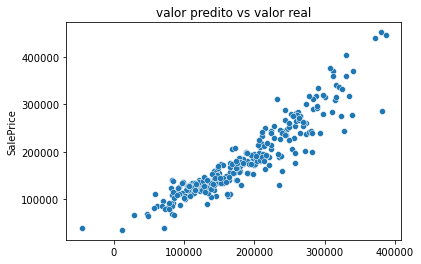

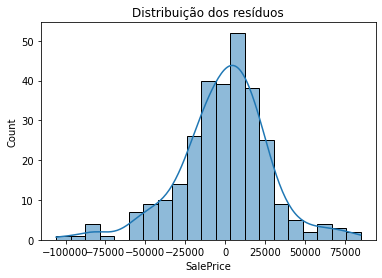


####################################################


Métricas de avaliação:
R^2: 0.8563506695017936
MAE: 20734.904154105705
MSE: 793479736.890522
RMSE: 28168.772371023235


In [52]:
# de resto, pode seguir como tínhamos antes!

df = df.select_dtypes(include=[np.number])
df = df.dropna(axis="columns", how="any")

X = df.drop(columns=["Id","SalePrice"])
y = df['SalePrice']

# 1)
from sklearn.linear_model import LinearRegression

# 2)
estimador = LinearRegression()

# 3)
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# 4)
modelo = estimador.fit(X_treino, y_treino)

print("Intercepto:", modelo.intercept_)
print("Coeficienter angular:", modelo.coef_)

print("\n####################################################\n")

# 5)
predictions = modelo.predict(X_teste)

plt.title("valor predito vs valor real")
sns.scatterplot(x=predictions, y=y_teste)
plt.show()

plt.title("Distribuição dos resíduos")
sns.histplot(y_teste-predictions, kde=True)
plt.show()

print("\n####################################################\n")

print("\nMétricas de avaliação:")

# 6)
from sklearn import metrics

print('R^2:', metrics.r2_score(y_test, predictions))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

In [53]:
# dica: use o código abaixo para fazer um dataframe com os coeficientes

coeff_df = pd.DataFrame(modelo.coef_, X.columns, columns=['Coefficient'])

coeff_df

,Coefficient
MSSubClass,-112.585601
LotArea,0.490238
OverallQual,14675.636583
OverallCond,5055.659575
YearBuilt,394.922596
YearRemodAdd,134.368773
BsmtFinSF1,25.916880
BsmtFinSF2,-2.655712
BsmtUnfSF,0.639941
TotalBsmtSF,23.901109


Para quem quiser um pouco mais de informação estatística sobre o modelo, use a bibliotexa statsmodels:

In [54]:
df = df.select_dtypes(include=[np.number])
df = df.dropna(axis="columns", how="any")

X = df.drop(columns=["Id","SalePrice"])
y = df['SalePrice']

# 1)
import statsmodels.api as sm

# 3)
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# 2)
estimador = sm.OLS(y_treino, X_treino)

# 4)
modelo = estimador.fit()

In [55]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.976
Method:                 Least Squares   F-statistic:                              1557.
Date:                Tue, 10 Nov 2020   Prob (F-statistic):                        0.00
Time:                        23:27:29   Log-Likelihood:                         -13675.
No. Observations:                1166   AIC:                                  2.741e+04
Df Residuals:                    1135   BIC:                                  2.757e+04
Df Model:                          31                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
MSSubClass     -112.9757     25.784     -4.382      0.000    -163.565     -62.386
LotArea           0.4897      0.092      5.347      0.000       0.310       0.669
OverallQual    1.468e+04   1149.917     12.766      0.000    1.24e+04    1.69e+04
OverallCond    5055.3371   1003.406      5.038      0.000    3086.597    7024.077
YearBuilt       393.8115     58.781      6.700      0.000     278.480     509.143
YearRemodAdd    134.6944     64.327      2.094      0.036       8.482     260.907
BsmtFinSF1       25.8925      2.538     10.203      0.000      20.913      30.872
BsmtFinSF2       -2.6059      4.443     -0.587      0.558     -11.323       6.112
BsmtUnfSF         0.6295      2.366      0.266      0.790      -4.013       5.272
TotalBsmtSF      23.9161      3.372      7.092      0.000      17.300      30.532
1stFlrSF         24.0320      6.211      3.869      0.000      11.846      36.218
2ndFlrSF         24.8970      5.755      4.326      0.000      13.605      36.189
LowQualFinSF     -3.0874     15.243     -0.203      0.840     -32.994      26.819
GrLivArea        45.8416      5.794      7.911      0.000      34.473      57.211
BsmtFullBath   -566.8929   2573.379     -0.220      0.826   -5616.006    4482.221
BsmtHalfBath  -3749.6828   3989.406     -0.940      0.347   -1.16e+04    4077.757
FullBath      -1162.8760   2732.627     -0.426      0.671   -6524.444    4198.692
HalfBath      -1893.8479   2545.789     -0.744      0.457   -6888.829    3101.133
BedroomAbvGr  -1.515e+04   1702.512     -8.897      0.000   -1.85e+04   -1.18e+04
KitchenAbvGr  -1.419e+04   5121.771     -2.770      0.006   -2.42e+04   -4138.505
TotRmsAbvGrd   5483.1222   1221.826      4.488      0.000    3085.831    7880.413
Fireplaces      607.4039   1723.784      0.352      0.725   -2774.757    3989.565
GarageCars     1333.9409   2855.214      0.467      0.640   -4268.151    6936.032
GarageArea       20.8575      9.575      2.178      0.030       2.072      39.643
WoodDeckSF       10.0827      7.733      1.304      0.193      -5.091      25.256
OpenPorchSF      18.9011     14.484      1.305      0.192      -9.518      47.320
EnclosedPorch     0.9614     16.819      0.057      0.954     -32.039      33.962
3SsnPorch        14.1770     28.570      0.496      0.620     -41.878      70.232
ScreenPorch      20.2451     17.012      1.190      0.234     -13.133      53.623
PoolArea         53.5397     23.451      2.283      0.023       7.528      99.551
MiscVal          -1.9617      1.646     -1.192      0.234      -5.191       1.267
MoSold         -403.5049    335.434     -1.203      0.229   -1061.645     254.635
YrSold         -551.8729     65.000     -8.490      0.000    -679.407    -424.339
================================

A performance do modelo melhorou?

Será que dá pra melhorar mais?

Opções:

- tentar apenas um subconjunto de features: **feature selection**


- passar a utilizar as features categóricas: **feacture engeneering**

____
____
____

## 4) Tradeoff viés-variância

Veremos agora um dos conceitos mais importantes em apredizado de maquina.

Muitas vezes alguns modelos têm 100% de acerto nos dados de **treino**, mas **na base de teste** a performance cai para menos de 50%.

Isso pode acontecer porque o modelo fica **especialista apenas no conjunto de treino**, não conseguindo **generalizar os padrões para além dos dados vistos**.

<img src="https://miro.medium.com/max/1125/1*_7OPgojau8hkiPUiHoGK_w.png" width=800>

O overfitting está intimamente ligado com o conceito de **viés** (bias) e **variância** (variance):

>**Viés**<br>
É a diferença entre o que o modelo prediz, e o valor correto a ser predito.<br>
Modelos com alto viés são muito simples, de modo a **não conseguir capturar as relações que os dados de treino exibem** (underfit).<br>
Issso faz com que ambos os erros de treino e de teste sejam altos.
<br><br>
Em outras palavras:<br>
**Incapacidade de um modelo de capturar a verdadeira relação entre features e target**


> **Variância**<br>
Variância se refere à variabilidade das predições de um modelo.<br>
Modelos com alta variância são muito complexos, por **aprenderem demais as relações  exibidas nos dados de treino** (overfit).<br>
Isso faz com que os erros de treino sejam baixos, mas os erros de teste sejam altos.
<br><br>
Em outras palavras:<br>
**Incapacidade de um modelo performar bem em outros datasets diferentes do usado no treinamento**. 

<img src="https://www.learnopencv.com/wp-content/uploads/2017/02/Bias-Variance-Tradeoff-In-Machine-Learning-1.png" width=500>

<img src="https://miro.medium.com/max/1494/1*C7ZKM93QVdpeSCGbF5TjIg.png" width=800>

Para demonstrar overfit ser usado o conjuto de teste [anscombe](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)

In [56]:
df_anscombe = sns.load_dataset('anscombe')

df_anscombe

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [57]:
df = df_anscombe[df_anscombe["dataset"] == "III"].copy()

df

,dataset,x,y
22,III,10.0,7.46
23,III,8.0,6.77
24,III,13.0,12.74
25,III,9.0,7.11
26,III,11.0,7.81
27,III,14.0,8.84
28,III,6.0,6.08
29,III,4.0,5.39
30,III,12.0,8.15
31,III,7.0,6.42


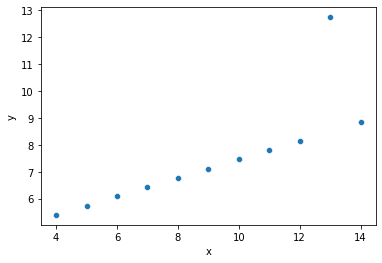

In [58]:
sns.scatterplot(data=df, x='x',y='y')

Vamos supor que este dado represente valores de medições de um sensor, porém o sensor teve um pequeno problema durante a medição.

Podemos perceber facilmente qual é este erro, e qual seria a função de regreesão para este sensor com os dados validos: **regressão linear**.

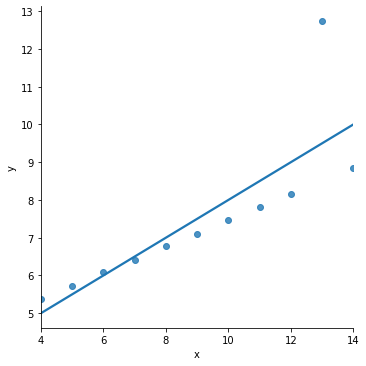

In [59]:
sns.lmplot(data=df, x='x', y='y', ci=False)

Perceba que a função linear encontrar já aprensenta um padrão muito similiar aos dados, porém um ponto error faz com que ela não tenha um resultado otimo.

Podemos utilizar regressões polinomiais, que possuem ordem maiores que 1, para tentar diminuir o erro da regressão, obtendo uma equação do formato.

$$\hat{y}_{i} = \beta_{1} + \beta_{2} x_{i} + \beta_{3} {x_{i}}^{2} + \cdots + \beta_{6} {x_{i}}^{6}$$

Para criar modelos polinomiaus com o sklearn, [dê uma olhada aqui](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

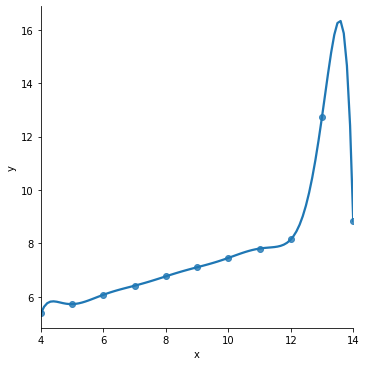

In [60]:
# pra sumir os wanings
import warnings 
warnings.filterwarnings('ignore')

sns.lmplot(data=df, x='x', y='y', order=11, ci=False)

Ao utilizarmos uma regressão de ordem 6 percebemos que ela se ajusta ao valor com erro, porém ela **se distancia da regressão que realmente representa os dados**. 

Tentar **aprender o erro faz com ela com ela não aprenda a função real**. 

Isto acontece pois ela se **super ajustou aos dados de treino, se distanciando dos dados reais**. 

__Como garantir que nosso modelo não está sofrendo de overfitting?__

Naturalmente, essa é uma pergunta de extrema importância, especialmente no contexto de **Redes neurais**. [Veja aqui](https://towardsdatascience.com/8-simple-techniques-to-prevent-overfitting-4d443da2ef7d) e [aqui](https://towardsdatascience.com/dont-overfit-how-to-prevent-overfitting-in-your-deep-learning-models-63274e552323) algumas discussões.

Na prática: **jamais se apegue à peformance de treino!!**. O que queremos otimizar sempre será a performance **avaliada nos dados de teste**. Assim, garantimos que uma boa performance não é produto do overfitting!

____
___
___